# 시각화

# 1. 데이터 불러오기

웹 기반 서비스의 사용자 행동, 설문 기반 사용자 특성 데이터

sample_data.csv 파일을 불러와주세요

In [5]:
import pandas as pd

data = pd.read_csv("data/sample_data.csv")
data.head(10)

,날짜,성별,지역,만족도,평균 체류 시간(분),월 수입(만원),방문 페이지 수,자녀 수
0,2024-01-01,남,대전,상,40.4,193.0,3,0
1,2024-01-02,여,대전,중,34.8,288.0,2,2
2,2024-01-03,남,서울,하,57.2,274.0,8,0
3,2024-01-04,남,대전,중,45.1,329.0,7,1
4,2024-01-05,남,서울,상,23.8,341.0,4,0
5,2024-01-06,여,부산,중,41.5,433.0,3,1
6,2024-01-07,남,대전,중,34.7,377.0,8,0
7,2024-01-08,남,부산,상,46.8,285.0,6,1
8,2024-01-09,남,서울,중,33.7,266.0,7,0
9,2024-01-10,여,광주,상,39.1,350.0,7,2


# 2. 시각화

## 1) 범주형 데이터

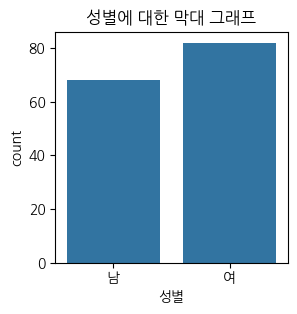

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

plt.figure(figsize=(3,3))
sns.countplot(data=data, x='성별')
plt.title('성별에 대한 막대 그래프')
plt.show()


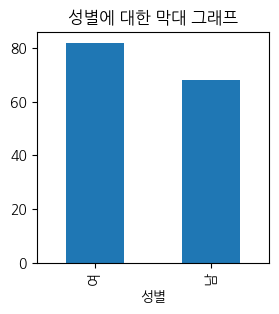

In [51]:
plt.figure(figsize=(3,3))
gender_data = data['성별'].value_counts()
gender_data.plot(kind='bar')
plt.title('성별에 대한 막대 그래프')
plt.show()

# 2) 순서형 데이터

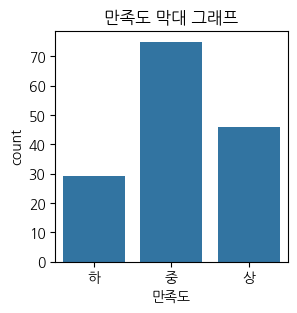

In [52]:
plt.figure(figsize=(3,3))
sns.countplot(data=data, x='만족도', order=['하', '중', '상'])
plt.title('만족도 막대 그래프')
plt.show()

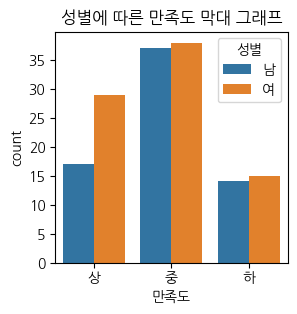

In [38]:
plt.figure(figsize=(3,3))
sns.countplot(data=data, x='만족도', hue='성별')
plt.title('성별에 따른 만족도 막대 그래프')
plt.show()

# 3) 연속형 데이터

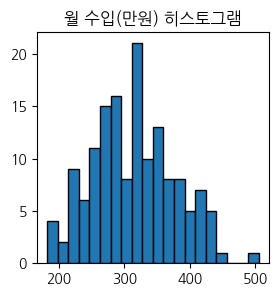

In [57]:
plt.figure(figsize=(3,3))
plt.hist(data['월 수입(만원)'], bins=20, edgecolor='black')
plt.title('월 수입(만원) 히스토그램')
plt.show()

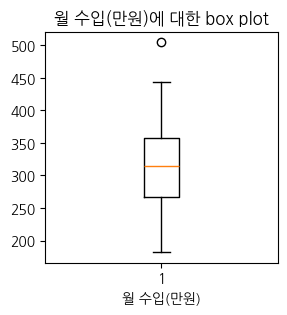

In [78]:
plt.figure(figsize=(3,3))
plt.boxplot(x=data['월 수입(만원)'])
plt.title('월 수입(만원)에 대한 box plot')
plt.xlabel('월 수입(만원)')
plt.show()

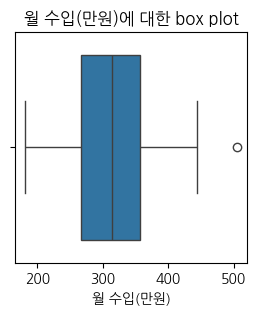

In [75]:
plt.figure(figsize=(3,3))
sns.boxplot(data=data, x='월 수입(만원)')
plt.title('월 수입(만원)에 대한 box plot')
plt.xlabel('월 수입(만원)')
plt.show()

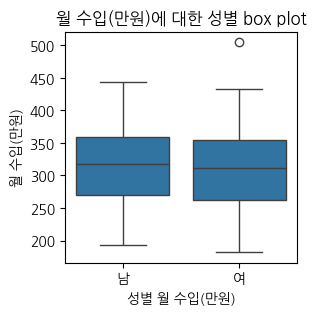

In [68]:
plt.figure(figsize=(3,3))
sns.boxplot(data=data, x='성별', y='월 수입(만원)')
plt.title('월 수입(만원)에 대한 성별 box plot')
plt.xlabel('성별 월 수입(만원)')
plt.show()

# 4) 이산형 데이터

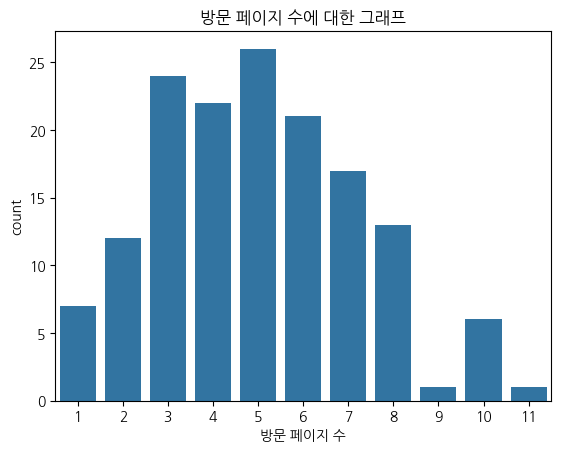

In [85]:
# 방문 페이지

fig, ax = plt.subplots()
sns.countplot(data=data, x='방문 페이지 수', ax=ax)
ax.set_title('방문 페이지 수에 대한 그래프')
plt.show()

# 5) 시계열 데이터 - 날짜

In [ ]:
data = pd.read_csv("data/sample_data.csv", parse_dates=['날짜']) # 불러올 때 변경
data['날짜'] = pd.to_datetime(data['날짜']) # 불러온 이후에 변경

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   날짜           150 non-null    datetime64[ns]
 1   성별           150 non-null    object        
 2   지역           150 non-null    object        
 3   만족도          150 non-null    object        
 4   평균 체류 시간(분)  150 non-null    float64       
 5   월 수입(만원)     150 non-null    float64       
 6   방문 페이지 수     150 non-null    int64         
 7   자녀 수         150 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 9.5+ KB


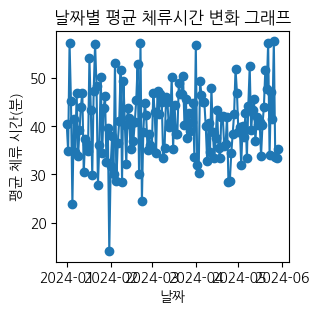

In [98]:
fig, ax = plt.subplots(figsize=(3,3))
ax.plot(data['날짜'], data['평균 체류 시간(분)'], marker='o')
ax.set_title('날짜별 평균 체류시간 변화 그래프')
ax.set_xlabel('날짜')
ax.set_ylabel('평균 체류 시간(분)')
plt.show()


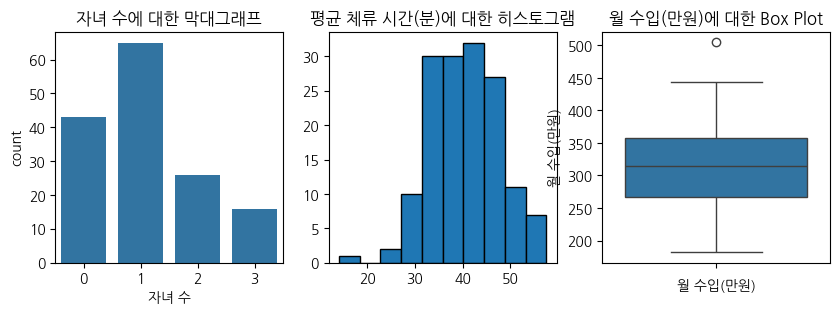

In [7]:
fig, ax = plt.subplots(1, 3, figsize=(10,3))
# 첫번째 그래프: 자녀 수에 대한 막대 그래프
sns.countplot(data=data, x="자녀 수", ax=ax[0])
ax[0].set_title("자녀 수에 대한 막대그래프")
# 두번째 그래프: 평균 체류 시간(분)에 대한 히스토그램
ax[1].hist(data["평균 체류 시간(분)"], edgecolor="black")
ax[1].set_title("평균 체류 시간(분)에 대한 히스토그램")
# 세번째 그래프: 월 수입(만원)에 대한 상자그림
# ax[2].boxplot(x=data["월 수입(만원)"], vert=False)
sns.boxplot(y=data["월 수입(만원)"], ax=ax[2])
ax[2].set_title("월 수입(만원)에 대한 Box Plot")
ax[2].set_xlabel("월 수입(만원)")
plt.show()